In [1]:
import numpy as np
import pandas as pd

input_file = "kc_house_data.csv"
df = pd.read_csv(input_file)

In [2]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())
    
def display_scores_mean(scores):
    print("Mean:", scores.mean())

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

**특성 목록**

0. ID
1. 거래 날짜
2. 거래 가격 (레이블로 사용될 예정)
3. 침실 수
4. 욕실 수
5. 내부 면적
6. 땅 면적
7. 층수
8. 해변 조망
9. 경관
10. 상태
11. 구조 설계
12. 위층 면적
13. 지하 면적
14. 건축 연도
15. 증축 연도
16. 우편 주소
17. 위도
18. 경도
19. 주위 15가구 내부 면적
20. 주위 15가구 외부 면적

**날짜를 숫자로 변환**

In [4]:
df['date']=  pd.to_datetime(df['date'])
df['date'] = df['date'].apply(lambda x: x.strftime('%Y%m%d'))
df["date"] = df["date"].astype('int64')

In [5]:
corr_matrix = df.corr()
corr_matrix["price"].sort_values(ascending=False)

price            1.000000
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.525138
view             0.397293
sqft_basement    0.323816
bedrooms         0.308350
lat              0.307003
waterfront       0.266369
floors           0.256794
yr_renovated     0.126434
sqft_lot         0.089661
sqft_lot15       0.082447
yr_built         0.054012
condition        0.036362
long             0.021626
date             0.003033
id              -0.016762
zipcode         -0.053203
Name: price, dtype: float64

In [6]:
x_train = df.drop(["id", "yr_built", "price", "bedrooms", "bathrooms", "floors", "sqft_basement"], axis=1)
y_labels = df["price"].copy()

In [7]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21613 non-null  int64  
 1   sqft_living    21613 non-null  int64  
 2   sqft_lot       21613 non-null  int64  
 3   waterfront     21613 non-null  int64  
 4   view           21613 non-null  int64  
 5   condition      21613 non-null  int64  
 6   grade          21613 non-null  int64  
 7   sqft_above     21613 non-null  int64  
 8   yr_renovated   21613 non-null  int64  
 9   zipcode        21613 non-null  int64  
 10  lat            21613 non-null  float64
 11  long           21613 non-null  float64
 12  sqft_living15  21613 non-null  int64  
 13  sqft_lot15     21613 non-null  int64  
dtypes: float64(2), int64(12)
memory usage: 2.3 MB


## 랜덤 포레스트 회귀

In [8]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor

rf_reg = RandomForestRegressor(random_state = 42, n_jobs = -1)
rf_reg.fit(x_train, y_labels)

rf_scores = cross_val_score(rf_reg, x_train, y_labels, scoring = "neg_mean_squared_error", cv=10)
rf_rmse_scores = np.sqrt(-rf_scores)
display_scores(rf_rmse_scores)

Scores: [132325.6334198  136584.65242584 113944.04790517 132106.87028976
 109301.75752643 131968.56450518 139441.28049103 116204.74661956
 121386.55033387 131130.62579354]
Mean: 126439.47293101896
Standard deviation: 9856.136662276902


In [9]:
rf_reg = ExtraTreesRegressor(random_state = 42, n_jobs = -1)
rf_reg.fit(x_train, y_labels)

rf_scores = cross_val_score(rf_reg, x_train, y_labels, scoring = "neg_mean_squared_error", cv=10)
rf_rmse_scores = np.sqrt(-rf_scores)
display_scores(rf_rmse_scores)

Scores: [122402.30361699 139164.13438586 112306.12529039 129863.77089984
 109164.01022771 137327.77160125 132007.83034109 116527.01399854
 123423.93831584 129394.0969103 ]
Mean: 125158.09955877978
Standard deviation: 9681.721220342968


<BarContainer object of 14 artists>

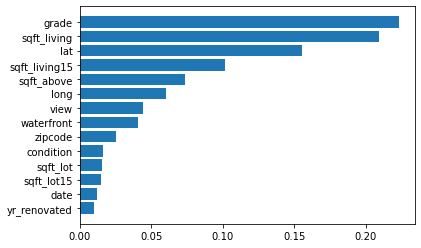

In [10]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

sorted_idx = rf_reg.feature_importances_.argsort()

plt.barh(x_train.columns[sorted_idx], rf_reg.feature_importances_[sorted_idx])

변화값이 큰 10개의 특성들만 조합해봄

1. lat
2. long
3. waterfront
4. grade
5. sqft_living
6. view
7. zipcode
8. date
9. condition
10. sqft_living15

# x_train_lat

In [11]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

In [12]:
x_train_lat_long = x_train.copy()
x_train_lat_waterfront = x_train.copy()
x_train_lat_grade = x_train.copy()
x_train_lat_sqft_living = x_train.copy()
x_train_lat_view = x_train.copy()
x_train_lat_zipcode = x_train.copy()
x_train_lat_date = x_train.copy()
x_train_lat_condition = x_train.copy()
x_train_lat_sqft_living15 = x_train.copy()

**lat_long**

In [13]:
x_train_lat_long["lat_long"] = x_train.lat / x_train.long #mean값이 가장 낮게 나오는 특성 조합

In [14]:
# rf_reg = ExtraTreesRegressor(random_state = 42, n_jobs = -1)
# rf_reg.fit(x_train_lat_long, y_labels)

# rf_scores = cross_val_score(rf_reg, x_train_lat_long, y_labels, scoring = "neg_mean_squared_error", cv=10)
# rf_rmse_scores = np.sqrt(-rf_scores)
# display_scores(rf_rmse_scores)

**lat_waterfront**

In [15]:
x_train_lat_waterfront["lat_waterfront"] = x_train.lat + x_train.waterfront

# rf_reg = ExtraTreesRegressor(random_state = 42, n_jobs = -1)
# rf_reg.fit(x_train_lat_waterfront, y_labels)

# rf_scores = cross_val_score(rf_reg, x_train_lat_waterfront, y_labels, scoring = "neg_mean_squared_error", cv=10)
# rf_rmse_scores = np.sqrt(-rf_scores)
# display_scores(rf_rmse_scores)

**lat_grade**

In [16]:
x_train_lat_grade["lat_grade"] = x_train.lat - x_train.grade

# rf_reg = ExtraTreesRegressor(random_state = 42, n_jobs = -1)
# rf_reg.fit(x_train_lat_grade, y_labels)

# rf_scores = cross_val_score(rf_reg, x_train_lat_grade, y_labels, scoring = "neg_mean_squared_error", cv=10)
# rf_rmse_scores = np.sqrt(-rf_scores)
# display_scores(rf_rmse_scores)

**lat_view**

In [17]:
x_train_lat_zipcode["lat_view"] = x_train.lat - x_train.view

# rf_reg = ExtraTreesRegressor(random_state = 42, n_jobs = -1)
# rf_reg.fit(x_train_lat_view, y_labels)

# rf_scores = cross_val_score(rf_reg, x_train_lat_view, y_labels, scoring = "neg_mean_squared_error", cv=10)
# rf_rmse_scores = np.sqrt(-rf_scores)
# display_scores(rf_rmse_scores)

**x_train_lat_zipcode**

In [18]:
x_train_lat_zipcode["lat_zipcode"] = x_train.lat / x_train.zipcode

# rf_reg = ExtraTreesRegressor(random_state = 42, n_jobs = -1)
# rf_reg.fit(x_train_lat_zipcode, y_labels)

# rf_scores = cross_val_score(rf_reg, x_train_lat_zipcode, y_labels, scoring = "neg_mean_squared_error", cv=10)
# rf_rmse_scores = np.sqrt(-rf_scores)
# display_scores(rf_rmse_scores)

**x_train_lat_date**

In [19]:
x_train_lat_date["lat_date"] = x_train.lat * x_train.date

# rf_reg = ExtraTreesRegressor(random_state = 42, n_jobs = -1)
# rf_reg.fit(x_train_lat_date, y_labels)

# rf_scores = cross_val_score(rf_reg, x_train_lat_date, y_labels, scoring = "neg_mean_squared_error", cv=10)
# rf_rmse_scores = np.sqrt(-rf_scores)
# display_scores(rf_rmse_scores)

**x_train_lat_condition**

In [20]:
x_train_lat_condition["lat_condition"] = x_train.lat - x_train.condition

# rf_reg = ExtraTreesRegressor(random_state = 42, n_jobs = -1)
# rf_reg.fit(x_train_lat_condition, y_labels)

# rf_scores = cross_val_score(rf_reg, x_train_lat_condition, y_labels, scoring = "neg_mean_squared_error", cv=10)
# rf_rmse_scores = np.sqrt(-rf_scores)
# display_scores(rf_rmse_scores)

**x_train_lat_sqft_living15**

In [21]:
x_train_lat_sqft_living15["lat_sqft_living15"] = x_train.lat * x_train.sqft_living15

# rf_reg = ExtraTreesRegressor(random_state = 42, n_jobs = -1)
# rf_reg.fit(x_train_lat_sqft_living15, y_labels)

# rf_scores = cross_val_score(rf_reg, x_train_lat_sqft_living15, y_labels, scoring = "neg_mean_squared_error", cv=10)
# rf_rmse_scores = np.sqrt(-rf_scores)
# display_scores(rf_rmse_scores)

# x_train_long

In [22]:
x_train_long_waterfront = x_train.copy()
x_train_long_grade = x_train.copy()
x_train_long_sqft_living = x_train.copy()
x_train_long_view = x_train.copy()
x_train_long_zipcode = x_train.copy()
x_train_long_date = x_train.copy()
x_train_long_condition = x_train.copy()
x_train_long_sqft_living15 = x_train.copy()

**x_train_long_waterfront**

In [23]:
x_train_long_waterfront["long_waterfront"] = x_train.long - x_train.waterfront

# rf_reg = ExtraTreesRegressor(random_state = 42, n_jobs = -1)
# rf_reg.fit(x_train_long_waterfront, y_labels)

# rf_scores = cross_val_score(rf_reg, x_train_long_waterfront, y_labels, scoring = "neg_mean_squared_error", cv=10)
# rf_rmse_scores = np.sqrt(-rf_scores)
# display_scores(rf_rmse_scores)

**x_train_long_grade**

In [24]:
x_train_long_grade["long_grade"] = x_train.long - x_train.grade

# rf_reg = ExtraTreesRegressor(random_state = 42, n_jobs = -1)
# rf_reg.fit(x_train_long_grade, y_labels)

# rf_scores = cross_val_score(rf_reg, x_train_long_grade, y_labels, scoring = "neg_mean_squared_error", cv=10)
# rf_rmse_scores = np.sqrt(-rf_scores)
# display_scores(rf_rmse_scores)

**x_train_long_sqft_living**

In [25]:
x_train_long_sqft_living["long_sqft_living"] = x_train.long / x_train.sqft_living

# rf_reg = ExtraTreesRegressor(random_state = 42, n_jobs = -1)
# rf_reg.fit(x_train_long_sqft_living, y_labels)

# rf_scores = cross_val_score(rf_reg, x_train_long_sqft_living, y_labels, scoring = "neg_mean_squared_error", cv=10)
# rf_rmse_scores = np.sqrt(-rf_scores)
# display_scores(rf_rmse_scores)

**x_train_long_view**

In [26]:
x_train_long_view["long_view"] = x_train.view / x_train.long

# rf_reg = ExtraTreesRegressor(random_state = 42, n_jobs = -1)
# rf_reg.fit(x_train_long_view, y_labels)

# rf_scores = cross_val_score(rf_reg, x_train_long_view, y_labels, scoring = "neg_mean_squared_error", cv=10)
# rf_rmse_scores = np.sqrt(-rf_scores)
# display_scores(rf_rmse_scores)

**x_train_long_zipcode**

In [27]:
x_train_long_zipcode["long_zipcode"] = x_train.long / x_train.zipcode

# rf_reg = ExtraTreesRegressor(random_state = 42, n_jobs = -1)
# rf_reg.fit(x_train_long_zipcode, y_labels)

# rf_scores = cross_val_score(rf_reg, x_train_long_zipcode, y_labels, scoring = "neg_mean_squared_error", cv=10)
# rf_rmse_scores = np.sqrt(-rf_scores)
# display_scores(rf_rmse_scores)

**x_train_long_date**

In [28]:
x_train_long_date["long_date"] = x_train.long * x_train.date

# rf_reg = ExtraTreesRegressor(random_state = 42, n_jobs = -1)
# rf_reg.fit(x_train_long_date, y_labels)

# rf_scores = cross_val_score(rf_reg, x_train_long_date, y_labels, scoring = "neg_mean_squared_error", cv=10)
# rf_rmse_scores = np.sqrt(-rf_scores)
# display_scores(rf_rmse_scores)

**x_train_long_condition**

In [29]:
x_train_long_condition["long_condition"] = x_train.long / x_train.condition

# rf_reg = ExtraTreesRegressor(random_state = 42, n_jobs = -1)
# rf_reg.fit(x_train_long_condition, y_labels)

# rf_scores = cross_val_score(rf_reg, x_train_long_condition, y_labels, scoring = "neg_mean_squared_error", cv=10)
# rf_rmse_scores = np.sqrt(-rf_scores)
# display_scores(rf_rmse_scores)

**x_train_long_sqft_living15**

In [30]:
x_train_long_sqft_living15["long_sqft_living15"] = x_train.long / x_train.sqft_living15

# rf_reg = ExtraTreesRegressor(random_state = 42, n_jobs = -1)
# rf_reg.fit(x_train_long_sqft_living15, y_labels)

# rf_scores = cross_val_score(rf_reg, x_train_long_sqft_living15, y_labels, scoring = "neg_mean_squared_error", cv=10)
# rf_rmse_scores = np.sqrt(-rf_scores)
# display_scores(rf_rmse_scores)

# x_train_waterfront

In [31]:
x_train_waterfront_grade = x_train.copy()
x_train_waterfront_sqft_living = x_train.copy()
x_train_waterfront_view = x_train.copy()
x_train_waterfront_zipcode = x_train.copy()
x_train_waterfront_date = x_train.copy()
x_train_waterfront_condition = x_train.copy()
x_train_waterfront_sqft_living15 = x_train.copy()

**x_train_waterfront_grade**

In [32]:
x_train_waterfront_grade["waterfront_grade"] = x_train.waterfront / x_train.grade

# rf_reg = ExtraTreesRegressor(random_state = 42, n_jobs = -1)
# rf_reg.fit(x_train_waterfront_grade, y_labels)

# rf_scores = cross_val_score(rf_reg, x_train_waterfront_grade, y_labels, scoring = "neg_mean_squared_error", cv=10)
# rf_rmse_scores = np.sqrt(-rf_scores)
# display_scores(rf_rmse_scores)

**x_train_waterfront_sqft_living**

In [33]:
x_train_waterfront_sqft_living["waterfront_sqft_living"] = x_train.waterfront / x_train.sqft_living

# rf_reg = ExtraTreesRegressor(random_state = 42, n_jobs = -1)
# rf_reg.fit(x_train_waterfront_sqft_living, y_labels)

# rf_scores = cross_val_score(rf_reg, x_train_waterfront_sqft_living, y_labels, scoring = "neg_mean_squared_error", cv=10)
# rf_rmse_scores = np.sqrt(-rf_scores)
# display_scores(rf_rmse_scores)

**x_train_waterfront_view**

In [34]:
x_train_waterfront_view["waterfront_view"] = x_train.waterfront * x_train.view

# rf_reg = ExtraTreesRegressor(random_state = 42, n_jobs = -1)
# rf_reg.fit(x_train_waterfront_view, y_labels)

# rf_scores = cross_val_score(rf_reg, x_train_waterfront_view, y_labels, scoring = "neg_mean_squared_error", cv=10)
# rf_rmse_scores = np.sqrt(-rf_scores)
# display_scores(rf_rmse_scores)

**x_train_waterfront_zipcode**

In [35]:
x_train_waterfront_zipcode["waterfront_zipcode"] = x_train.waterfront + x_train.zipcode

# rf_reg = ExtraTreesRegressor(random_state = 42, n_jobs = -1)
# rf_reg.fit(x_train_waterfront_zipcode, y_labels)

# rf_scores = cross_val_score(rf_reg, x_train_waterfront_zipcode, y_labels, scoring = "neg_mean_squared_error", cv=10)
# rf_rmse_scores = np.sqrt(-rf_scores)
# display_scores(rf_rmse_scores)

**x_train_waterfront_date**

In [36]:
x_train_waterfront_date["waterfront_date"] = x_train.waterfront - x_train.date

# rf_reg = ExtraTreesRegressor(random_state = 42, n_jobs = -1)
# rf_reg.fit(x_train_waterfront_date, y_labels)

# rf_scores = cross_val_score(rf_reg, x_train_waterfront_date, y_labels, scoring = "neg_mean_squared_error", cv=10)
# rf_rmse_scores = np.sqrt(-rf_scores)
# display_scores(rf_rmse_scores)

**x_train_waterfront_condition**

In [37]:
x_train_waterfront_condition["waterfront_condition"] = x_train.waterfront + x_train.condition

# rf_reg = ExtraTreesRegressor(random_state = 42, n_jobs = -1)
# rf_reg.fit(x_train_waterfront_condition, y_labels)

# rf_scores = cross_val_score(rf_reg, x_train_waterfront_condition, y_labels, scoring = "neg_mean_squared_error", cv=10)
# rf_rmse_scores = np.sqrt(-rf_scores)
# display_scores(rf_rmse_scores)

**x_train_waterfront_sqft_living15**

In [38]:
x_train_waterfront_sqft_living15["waterfront_sqft_living15"] = x_train.waterfront * x_train.sqft_living15

# rf_reg = ExtraTreesRegressor(random_state = 42, n_jobs = -1)
# rf_reg.fit(x_train_waterfront_sqft_living15, y_labels)

# rf_scores = cross_val_score(rf_reg, x_train_waterfront_sqft_living15, y_labels, scoring = "neg_mean_squared_error", cv=10)
# rf_rmse_scores = np.sqrt(-rf_scores)
# display_scores(rf_rmse_scores)

# x_train_grade

In [39]:
x_train_grade_sqft_living = x_train.copy()
x_train_grade_view = x_train.copy()
x_train_grade_zipcode = x_train.copy()
x_train_grade_date = x_train.copy()
x_train_grade_condition = x_train.copy()
x_train_grade_sqft_living15 = x_train.copy()

**x_train_grade_sqft_living**

In [40]:
x_train_grade_sqft_living["grade_sqft_living"] = x_train.grade * x_train.sqft_living

# rf_reg = ExtraTreesRegressor(random_state = 42, n_jobs = -1)
# rf_reg.fit(x_train_grade_sqft_living, y_labels)

# rf_scores = cross_val_score(rf_reg, x_train_grade_sqft_living, y_labels, scoring = "neg_mean_squared_error", cv=10)
# rf_rmse_scores = np.sqrt(-rf_scores)
# display_scores(rf_rmse_scores)

**x_train_grade_view**

In [41]:
x_train_grade_view["grade_view"] = x_train.view / x_train.grade

# rf_reg = ExtraTreesRegressor(random_state = 42, n_jobs = -1)
# rf_reg.fit(x_train_grade_view, y_labels)

# rf_scores = cross_val_score(rf_reg, x_train_grade_view, y_labels, scoring = "neg_mean_squared_error", cv=10)
# rf_rmse_scores = np.sqrt(-rf_scores)
# display_scores(rf_rmse_scores)

**x_train_grade_zipcode**

In [42]:
x_train_grade_zipcode["grade_zipcode"] = x_train.grade + x_train.zipcode

# rf_reg = ExtraTreesRegressor(random_state = 42, n_jobs = -1)
# rf_reg.fit(x_train_grade_zipcode, y_labels)

# rf_scores = cross_val_score(rf_reg, x_train_grade_zipcode, y_labels, scoring = "neg_mean_squared_error", cv=10)
# rf_rmse_scores = np.sqrt(-rf_scores)
# display_scores(rf_rmse_scores)

**x_train_grade_date**

In [43]:
x_train_grade_date["grade_date"] = x_train.grade - x_train.date

# rf_reg = ExtraTreesRegressor(random_state = 42, n_jobs = -1)
# rf_reg.fit(x_train_grade_date, y_labels)

# rf_scores = cross_val_score(rf_reg, x_train_grade_date, y_labels, scoring = "neg_mean_squared_error", cv=10)
# rf_rmse_scores = np.sqrt(-rf_scores)
# display_scores(rf_rmse_scores)

**x_train_grade_condition**

In [44]:
x_train_grade_condition["grade_condition"] = x_train.grade / x_train.condition

# rf_reg = ExtraTreesRegressor(random_state = 42, n_jobs = -1)
# rf_reg.fit(x_train_grade_condition, y_labels)

# rf_scores = cross_val_score(rf_reg, x_train_grade_condition, y_labels, scoring = "neg_mean_squared_error", cv=10)
# rf_rmse_scores = np.sqrt(-rf_scores)
# display_scores(rf_rmse_scores)

**x_train_grade_sqft_living15**

In [45]:
x_train_grade_sqft_living15["grade_sqft_living15"] = x_train.grade * x_train.sqft_living15

# rf_reg = ExtraTreesRegressor(random_state = 42, n_jobs = -1)
# rf_reg.fit(x_train_grade_sqft_living15, y_labels)

# rf_scores = cross_val_score(rf_reg, x_train_grade_sqft_living15, y_labels, scoring = "neg_mean_squared_error", cv=10)
# rf_rmse_scores = np.sqrt(-rf_scores)
# display_scores(rf_rmse_scores)

# x_train_sqft_living

In [46]:
x_train_sqft_living_view = x_train.copy()
x_train_sqft_living_zipcode = x_train.copy()
x_train_sqft_living_date = x_train.copy()
x_train_sqft_living_condition = x_train.copy()
x_train_sqft_living_sqft_living15 = x_train.copy()

**x_train_sqft_living_view**

In [47]:
x_train_sqft_living_view["sqft_living_view"] = x_train.view / x_train.sqft_living

# rf_reg = ExtraTreesRegressor(random_state = 42, n_jobs = -1)
# rf_reg.fit(x_train_sqft_living_view, y_labels)

# rf_scores = cross_val_score(rf_reg, x_train_sqft_living_view, y_labels, scoring = "neg_mean_squared_error", cv=10)
# rf_rmse_scores = np.sqrt(-rf_scores)
# display_scores(rf_rmse_scores)

**x_train_sqft_living_zipcode**

In [48]:
x_train_sqft_living_zipcode["sqft_living_zipcode"] = x_train.sqft_living * x_train.zipcode

# rf_reg = ExtraTreesRegressor(random_state = 42, n_jobs = -1)
# rf_reg.fit(x_train_sqft_living_zipcode, y_labels)

# rf_scores = cross_val_score(rf_reg, x_train_sqft_living_zipcode, y_labels, scoring = "neg_mean_squared_error", cv=10)
# rf_rmse_scores = np.sqrt(-rf_scores)
# display_scores(rf_rmse_scores)

**x_train_sqft_living_date**

In [49]:
x_train_sqft_living_date["sqft_living_date"] = x_train.sqft_living - x_train.date

# rf_reg = ExtraTreesRegressor(random_state = 42, n_jobs = -1)
# rf_reg.fit(x_train_sqft_living_date, y_labels)

# rf_scores = cross_val_score(rf_reg, x_train_sqft_living_date, y_labels, scoring = "neg_mean_squared_error", cv=10)
# rf_rmse_scores = np.sqrt(-rf_scores)
# display_scores(rf_rmse_scores)

**x_train_sqft_living_condition**

In [50]:
x_train_sqft_living_condition["sqft_living_condition"] = x_train.sqft_living + x_train.condition

# rf_reg = ExtraTreesRegressor(random_state = 42, n_jobs = -1)
# rf_reg.fit(x_train_sqft_living_condition, y_labels)

# rf_scores = cross_val_score(rf_reg, x_train_sqft_living_condition, y_labels, scoring = "neg_mean_squared_error", cv=10)
# rf_rmse_scores = np.sqrt(-rf_scores)
# display_scores(rf_rmse_scores)

**x_train_sqft_living_sqft_living15**

In [51]:
x_train_sqft_living_sqft_living15["sqft_living_sqft_living15"] = x_train.sqft_living + x_train.sqft_living15

# rf_reg = ExtraTreesRegressor(random_state = 42, n_jobs = -1)
# rf_reg.fit(x_train_sqft_living_sqft_living15, y_labels)

# rf_scores = cross_val_score(rf_reg, x_train_sqft_living_sqft_living15, y_labels, scoring = "neg_mean_squared_error", cv=10)
# rf_rmse_scores = np.sqrt(-rf_scores)
# display_scores(rf_rmse_scores)

# x_train_view & x_train_zipcode

In [52]:
x_train_view_zipcode = x_train.copy()
x_train_view_date = x_train.copy()
x_train_view_condition = x_train.copy()
x_train_view_sqft_living15 = x_train.copy()

x_train_zipcode_date = x_train.copy()
x_train_zipcode_condition = x_train.copy()
x_train_zipcode_sqft_living15 = x_train.copy()

**x_train_view_zipcode**

In [53]:
x_train_view_zipcode["view_zipcode"] = x_train.view - x_train.zipcode

# rf_reg = ExtraTreesRegressor(random_state = 42, n_jobs = -1)
# rf_reg.fit(x_train_view_zipcode, y_labels)

# rf_scores = cross_val_score(rf_reg, x_train_view_zipcode, y_labels, scoring = "neg_mean_squared_error", cv=10)
# rf_rmse_scores = np.sqrt(-rf_scores)
# display_scores(rf_rmse_scores)

**x_train_view_date**

In [54]:
x_train_view_date["view_date"] = x_train.view * x_train.date

# rf_reg = ExtraTreesRegressor(random_state = 42, n_jobs = -1)
# rf_reg.fit(x_train_view_date, y_labels)

# rf_scores = cross_val_score(rf_reg, x_train_view_date, y_labels, scoring = "neg_mean_squared_error", cv=10)
# rf_rmse_scores = np.sqrt(-rf_scores)
# display_scores(rf_rmse_scores)

**x_train_view_condition**

In [55]:
x_train_view_condition["view_condition"] = x_train.view * x_train.condition

# rf_reg = ExtraTreesRegressor(random_state = 42, n_jobs = -1)
# rf_reg.fit(x_train_view_condition, y_labels)

# rf_scores = cross_val_score(rf_reg, x_train_view_condition, y_labels, scoring = "neg_mean_squared_error", cv=10)
# rf_rmse_scores = np.sqrt(-rf_scores)
# display_scores(rf_rmse_scores)

**x_train_view_sqft_living15**

In [56]:
x_train_view_sqft_living15["view_sqft_living15"] = x_train.view / x_train.sqft_living15

# rf_reg = ExtraTreesRegressor(random_state = 42, n_jobs = -1)
# rf_reg.fit(x_train_view_sqft_living15, y_labels)

# rf_scores = cross_val_score(rf_reg, x_train_view_sqft_living15, y_labels, scoring = "neg_mean_squared_error", cv=10)
# rf_rmse_scores = np.sqrt(-rf_scores)
# display_scores(rf_rmse_scores)

**x_train_zipcode_date**

In [57]:
x_train_zipcode_date["zipcode_date"] = x_train.zipcode + x_train.date

# rf_reg = ExtraTreesRegressor(random_state = 42, n_jobs = -1)
# rf_reg.fit(x_train_zipcode_date, y_labels)

# rf_scores = cross_val_score(rf_reg, x_train_zipcode_date, y_labels, scoring = "neg_mean_squared_error", cv=10)
# rf_rmse_scores = np.sqrt(-rf_scores)
# display_scores(rf_rmse_scores)

**x_train_zipcode_condition**

In [58]:
x_train_zipcode_condition["zipcode_condition"] = x_train.zipcode * x_train.condition

# rf_reg = ExtraTreesRegressor(random_state = 42, n_jobs = -1)
# rf_reg.fit(x_train_zipcode_condition, y_labels)

# rf_scores = cross_val_score(rf_reg, x_train_zipcode_condition, y_labels, scoring = "neg_mean_squared_error", cv=10)
# rf_rmse_scores = np.sqrt(-rf_scores)
# display_scores(rf_rmse_scores)

**x_train_zipcode_sqft_living15**

In [59]:
x_train_zipcode_sqft_living15["zipcode_sqft_living15"] = x_train.zipcode + x_train.sqft_living15

# rf_reg = ExtraTreesRegressor(random_state = 42, n_jobs = -1)
# rf_reg.fit(x_train_zipcode_sqft_living15, y_labels)

# rf_scores = cross_val_score(rf_reg, x_train_zipcode_sqft_living15, y_labels, scoring = "neg_mean_squared_error", cv=10)
# rf_rmse_scores = np.sqrt(-rf_scores)
# display_scores(rf_rmse_scores)

# x_train_date & x_train_condition

In [60]:
x_train_date_condition = x_train.copy()
x_train_date_sqft_living15 = x_train.copy()

x_train_condition_sqft_living15 = x_train.copy()

**x_train_date_condition**

In [61]:
x_train_date_condition["date_condition"] = x_train.date + x_train.condition

# rf_reg = ExtraTreesRegressor(random_state = 42, n_jobs = -1)
# rf_reg.fit(x_train_date_condition, y_labels)

# rf_scores = cross_val_score(rf_reg, x_train_date_condition, y_labels, scoring = "neg_mean_squared_error", cv=10)
# rf_rmse_scores = np.sqrt(-rf_scores)
# display_scores(rf_rmse_scores)

**x_train_date_sqft_living15**

In [62]:
x_train_date_sqft_living15["date_sqft_living15"] = x_train.date - x_train.sqft_living15

# rf_reg = ExtraTreesRegressor(random_state = 42, n_jobs = -1)
# rf_reg.fit(x_train_date_sqft_living15, y_labels)

# rf_scores = cross_val_score(rf_reg, x_train_date_sqft_living15, y_labels, scoring = "neg_mean_squared_error", cv=10)
# rf_rmse_scores = np.sqrt(-rf_scores)
# display_scores(rf_rmse_scores)

**x_train_condition_sqft_living15**

In [63]:
x_train_condition_sqft_living15["condition_sqft_living15"] = x_train.condition - x_train.sqft_living15

# rf_reg = ExtraTreesRegressor(random_state = 42, n_jobs = -1)
# rf_reg.fit(x_train_condition_sqft_living15, y_labels)

# rf_scores = cross_val_score(rf_reg, x_train_condition_sqft_living15, y_labels, scoring = "neg_mean_squared_error", cv=10)
# rf_rmse_scores = np.sqrt(-rf_scores)
# display_scores(rf_rmse_scores)

# 좋게 나온 결과들만 합쳐서 특성에 추가함

**117304... 기본 파라미터 기준 사실상 최고값(랜덤 42)**

random_state를 1000까지 서치 해보면 693에서 최고값임

부스팅/보팅 뭔가 잘 안됨...그냥 랜덤값이나 찾아볼 것

In [64]:
x_train_comb = x_train.copy()

x_train_comb["lat_long"] = x_train.lat / x_train.long #122696
x_train_comb["lat_waterfront"] = x_train.lat + x_train.waterfront #123195
x_train_comb["long_waterfront"] = x_train.long - x_train.waterfront #122865
x_train_comb["long_zipcode"] = x_train.long / x_train.zipcode #122366
x_train_comb["long_date"] = x_train.long * x_train.date #121885
x_train_comb["sqft_living_sqft_living15"] = x_train.sqft_living + x_train.sqft_living15 #123438
x_train_comb["lat_zipcode"] = x_train.lat / x_train.zipcode #123588

etr_reg = ExtraTreesRegressor(random_state = 42, n_jobs = -1)
etr_reg.fit(x_train_comb, y_labels)

etr_scores = cross_val_score(etr_reg, x_train_comb, y_labels, scoring = "neg_mean_squared_error", cv=10)
etr_rmse_scores = np.sqrt(-etr_scores)
display_scores(etr_rmse_scores)

Scores: [120558.76926544 129760.01053828 107805.74399612 117873.03518671
  98836.08638891 120584.12452125 123111.37631234 114646.10557796
 115883.4399411  123989.23735818]
Mean: 117304.79290862972
Standard deviation: 8340.322806716837


# 랜덤 시드 찾기 (테스트)

In [ ]:
etr_reg = ExtraTreesRegressor(random_state = 693, n_jobs = -1)
etr_reg.fit(x_train_comb, y_labels)

etr_scores = cross_val_score(etr_reg, x_train_comb, y_labels, scoring = "neg_mean_squared_error", cv=10)
past_rmse_scores = np.sqrt(-etr_scores)

for x in range(1000, 10000):
    etr_reg = ExtraTreesRegressor(random_state = x, n_jobs = -1)
    etr_reg.fit(x_train_comb, y_labels)

    etr_scores = cross_val_score(etr_reg, x_train_comb, y_labels, scoring = "neg_mean_squared_error", cv=10)
    current_rmse_scores = np.sqrt(-etr_scores)
    
    if current_rmse_scores.mean() < past_rmse_scores.mean():
        past_rmse_scores = current_rmse_scores
        print(f"{x}번째 rmse값{past_rmse_scores}")
        
display_scores(past_rmse_scores)

# 너무 오래 걸림..

In [ ]:
print(x)

# 3000번째 rmse값[119854.58872112 128288.8407912  107455.72553479 113545.97383659
#   98395.39859411 116706.83423825 124133.42950323 112951.19578099
#  113757.36474771 125182.83377625]
# 5619번째 rmse값[119987.48664853 131149.76469063 107812.7078123  113821.84019749
#   98160.2627291  113048.83323469 123053.44788626 113756.88232097
#  116026.87906551 122215.7497621 ]

# Voting Test

In [65]:
etr_reg1 = ExtraTreesRegressor(random_state = 5619, n_jobs = -1)
etr_reg1.fit(x_train_comb, y_labels)

etr_scores1 = cross_val_score(etr_reg1, x_train_comb, y_labels, scoring = "neg_mean_squared_error", cv=10, n_jobs = -1)
etr_rmse_scores1 = np.sqrt(-etr_scores1)
display_scores(etr_rmse_scores1)

Scores: [119987.48664853 131149.76469063 107812.7078123  113821.84019749
  98160.2627291  113048.83323469 123053.44788626 113756.88232097
 116026.87906551 122215.7497621 ]
Mean: 115903.38543475726
Standard deviation: 8587.681831962236


In [66]:
etr_reg2 = ExtraTreesRegressor(random_state = 3000, n_jobs = -1)
etr_reg2.fit(x_train_comb, y_labels)

etr_scores2 = cross_val_score(etr_reg2, x_train_comb, y_labels, scoring = "neg_mean_squared_error", cv=10, n_jobs = -1)
etr_rmse_scores2 = np.sqrt(-etr_scores2)
display_scores(etr_rmse_scores2)

Scores: [119854.58872112 128288.8407912  107455.72553479 113545.97383659
  98395.39859411 116706.83423825 124133.42950323 112951.19578099
 113757.36474771 125182.83377625]
Mean: 116027.21855242441
Standard deviation: 8485.966422509851


# Result!

In [67]:
from sklearn.ensemble import VotingRegressor

voting_clf = VotingRegressor(estimators = [('etr1', etr_reg1), ('etr2', etr_reg2)])
voting_clf.fit(x_train_comb, y_labels)

vt_scores = cross_val_score(voting_clf, x_train_comb, y_labels, scoring = "neg_mean_squared_error", cv=10, n_jobs = -1)
vt_rmse_scores = np.sqrt(-vt_scores)
display_scores(vt_rmse_scores)

Scores: [119436.40934729 129338.46270938 107256.86126407 113303.48391745
  97909.38910981 114468.12801648 123180.97576399 112951.56608926
 114458.39721175 123308.94678331]
Mean: 115561.26202127934
Standard deviation: 8472.223433516689


In [68]:
display_scores_mean(vt_rmse_scores)

Mean: 115561.26202127934
